## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
color_pal=sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

## Load Data and Get Info

In [2]:
time=pd.read_csv('/kaggle/input/hourly-energy-consumption/PJME_hourly.csv')

In [3]:
time.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
time.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [5]:
time.shape

(145366, 2)

In [6]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [7]:
time.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [8]:
time.isna().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [9]:
time.duplicated().sum()

0

In [10]:
time.sample()

,Datetime,PJME_MW
131536,2017-12-29 18:00:00,42982.0


## Preprocessing

In [11]:
time.set_index('Datetime')

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [12]:
time=time.set_index('Datetime')

<Axes: xlabel='Datetime'>

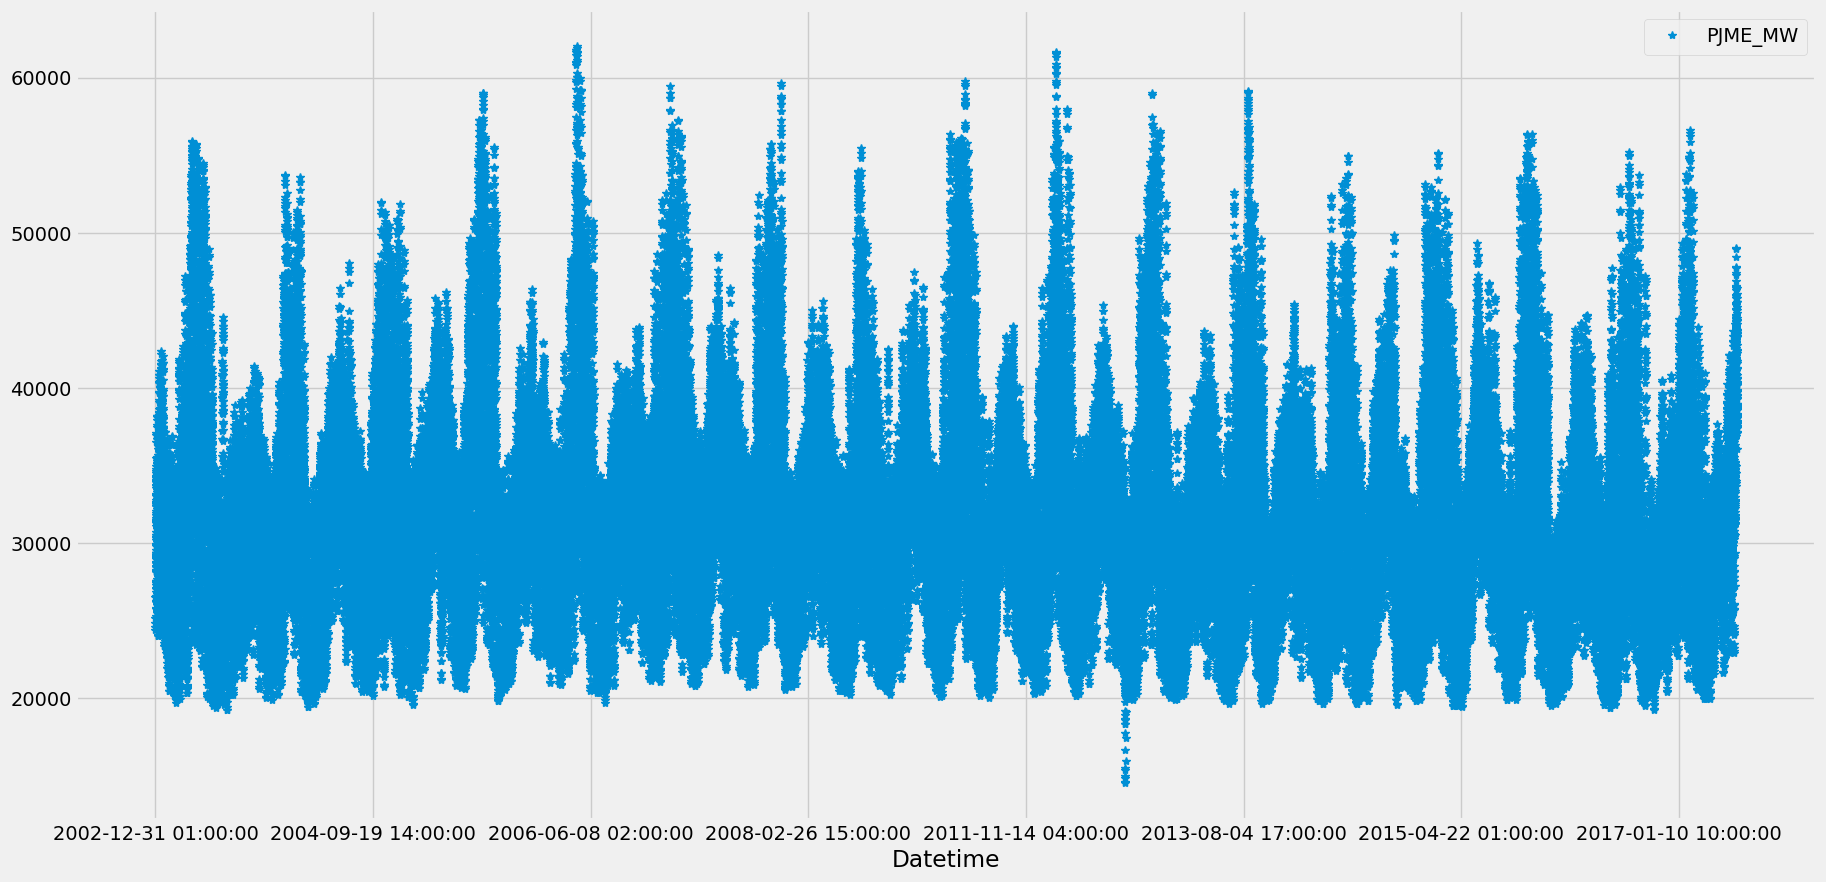

In [13]:
time.plot(figsize=(20,10),style='*')

In [14]:
pd.to_datetime(time.index)

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [15]:
time.index=pd.to_datetime(time.index)

In [16]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


<Axes: xlabel='Datetime'>

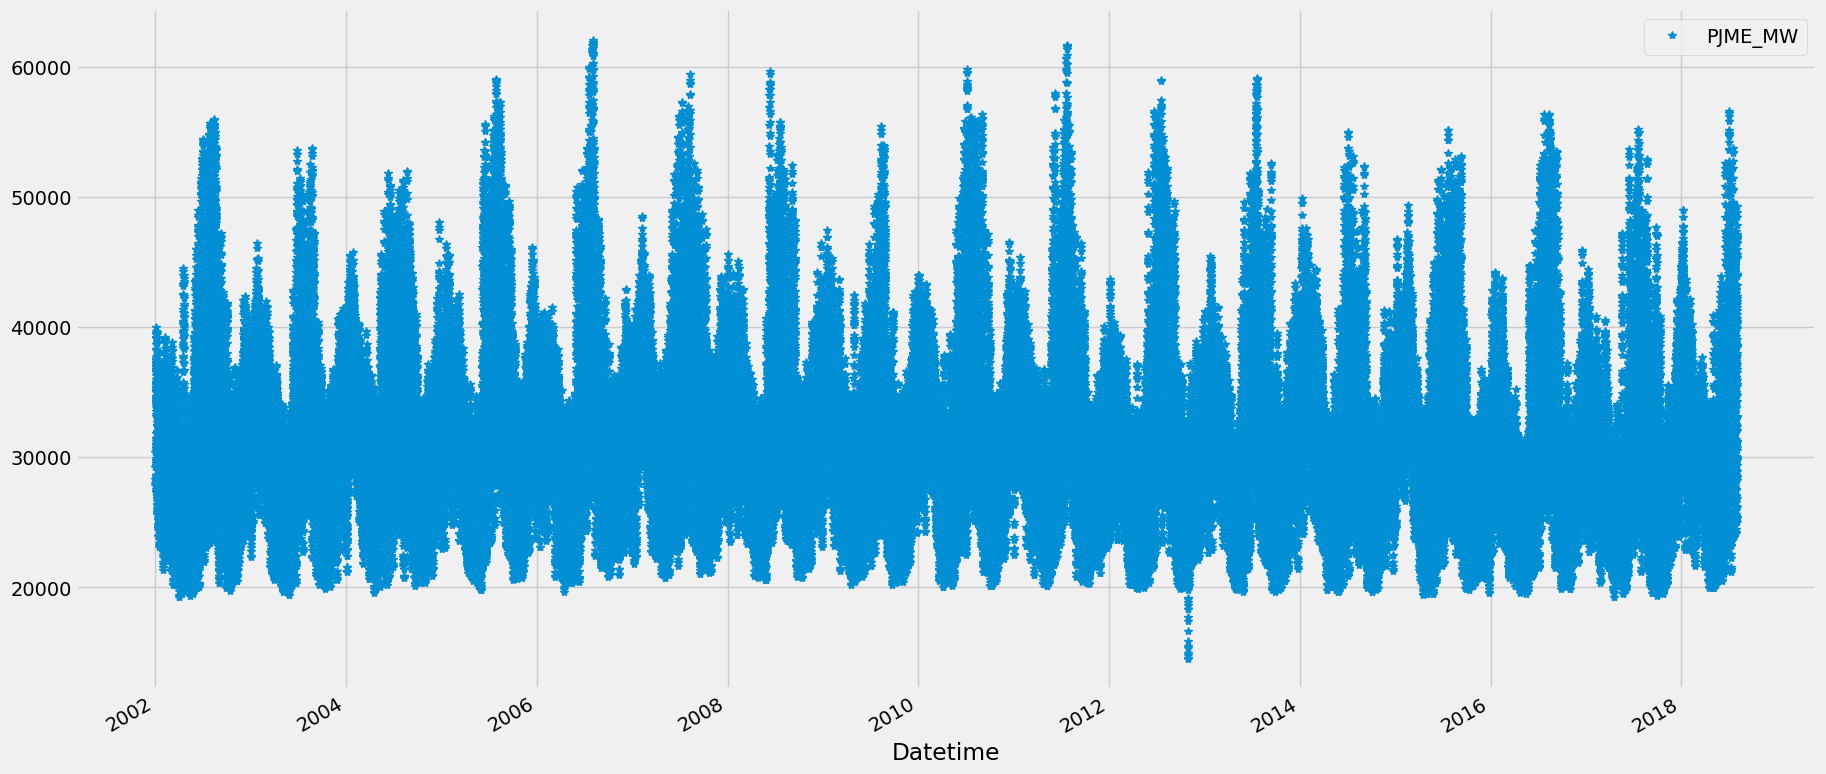

In [17]:
time.plot(figsize=(20,10),style='*')

## Feature Engineering

In [18]:
time['hour']=time.index.hour
time['dayofweek']=time.index.dayofweek
time['month']=time.index.month
time['quarter']=time.index.quarter
time['year']=time.index.year
time['dayofyear']=time.index.dayofyear

In [19]:
time.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365


## Visualization

<Axes: xlabel='hour', ylabel='PJME_MW'>

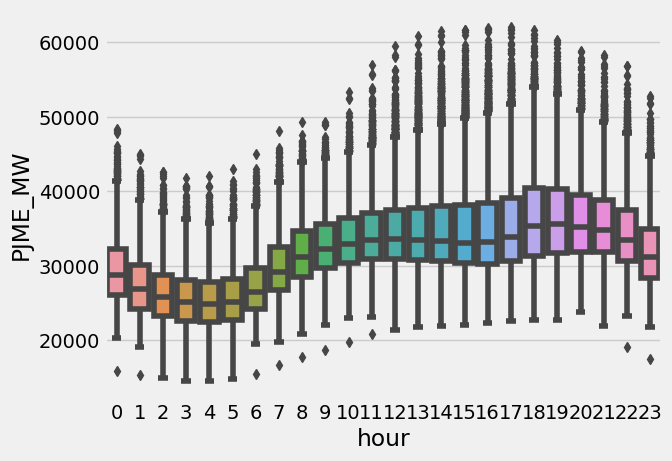

In [20]:
sns.boxplot(data=time,x='hour',y='PJME_MW')

<Axes: xlabel='month', ylabel='PJME_MW'>

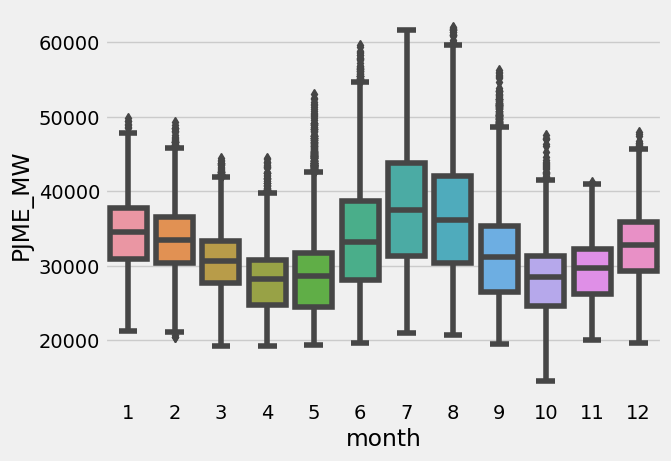

In [21]:
sns.boxplot(data=time,x='month',y='PJME_MW')

<Axes: xlabel='year', ylabel='PJME_MW'>

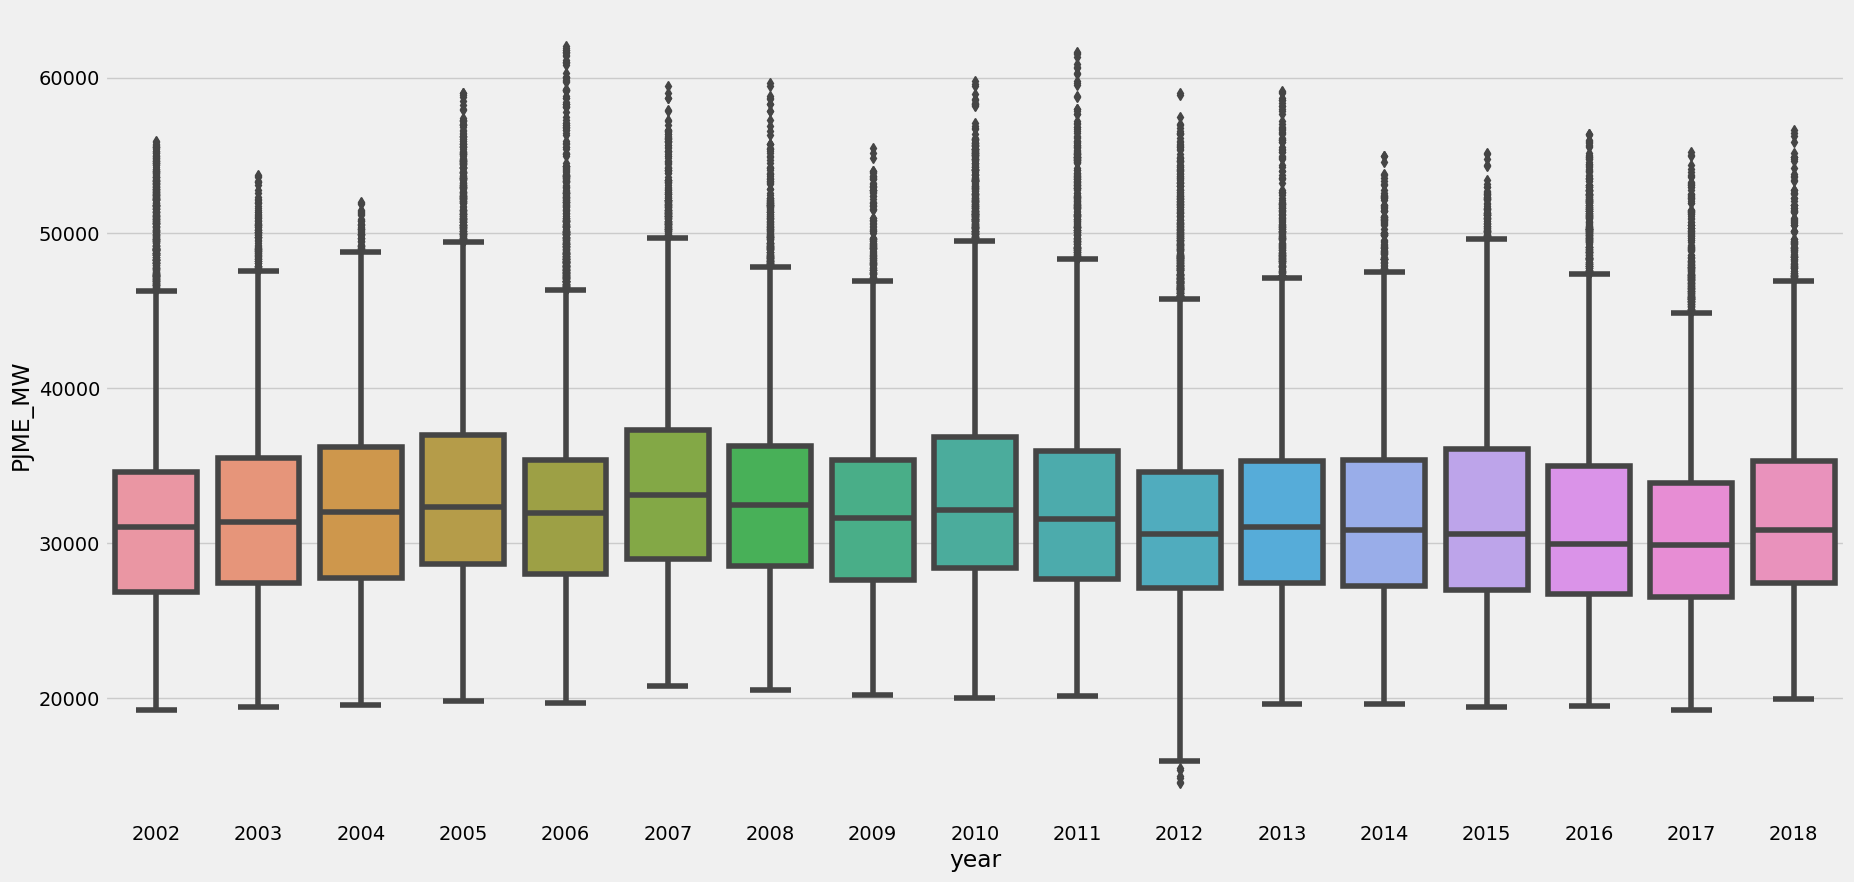

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data=time,x='year',y='PJME_MW')

<Axes: xlabel='quarter', ylabel='PJME_MW'>

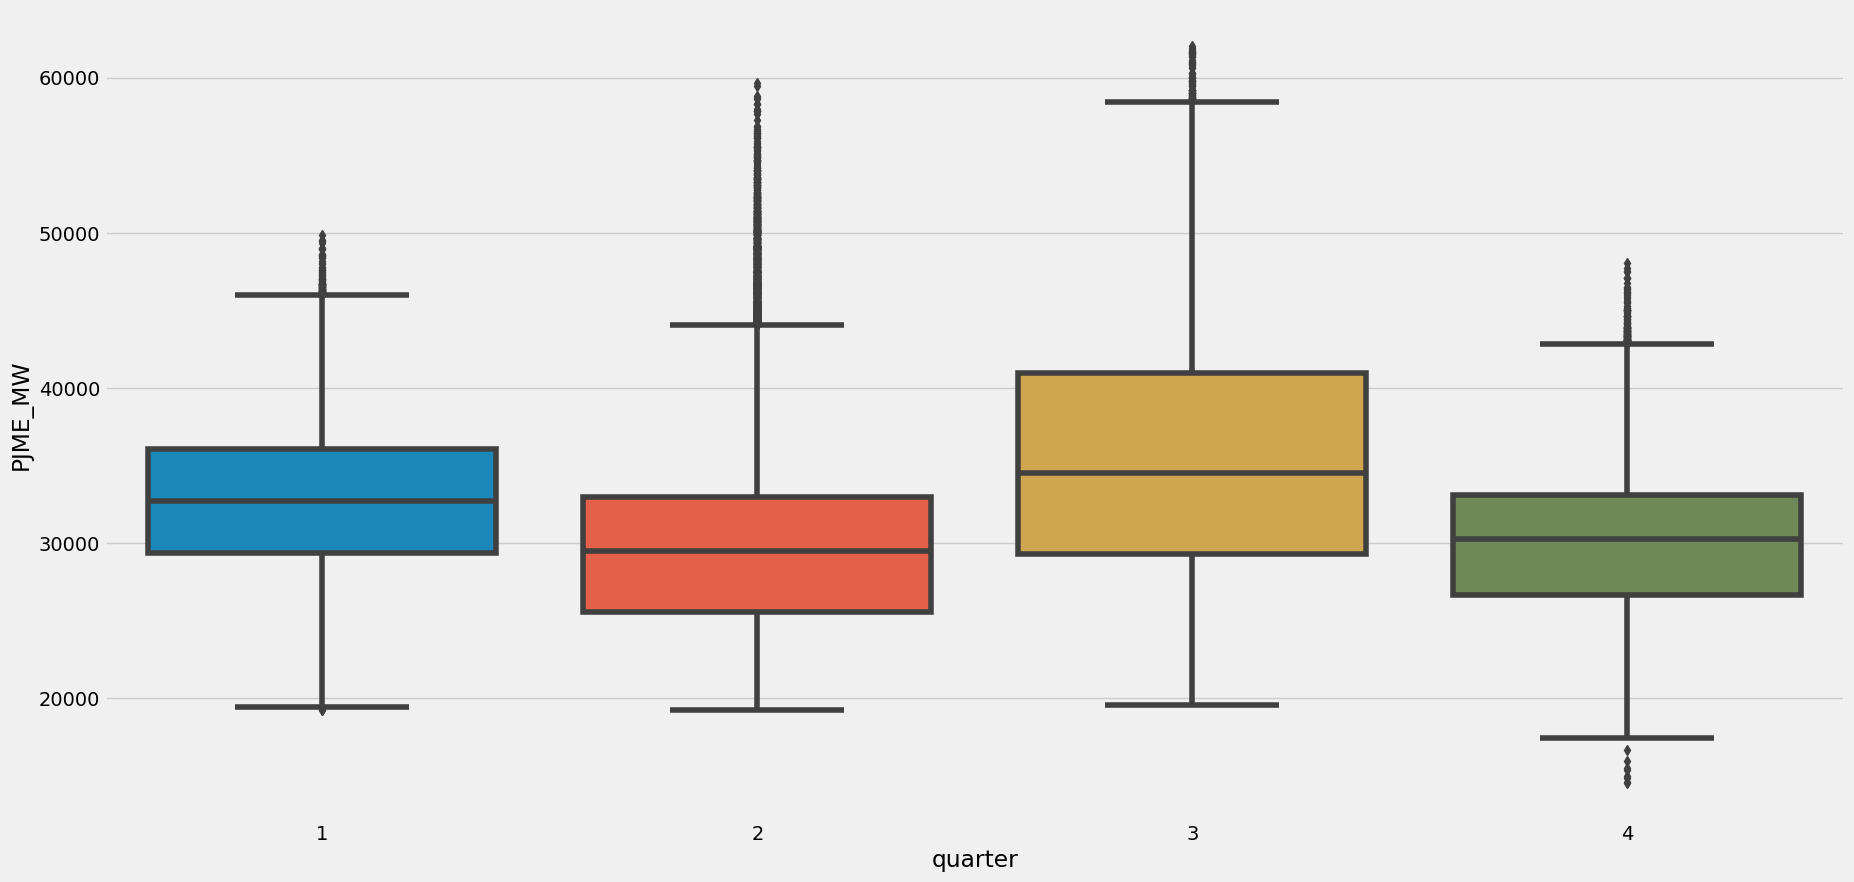

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=time,x='quarter',y='PJME_MW')

<Axes: xlabel='dayofweek', ylabel='PJME_MW'>

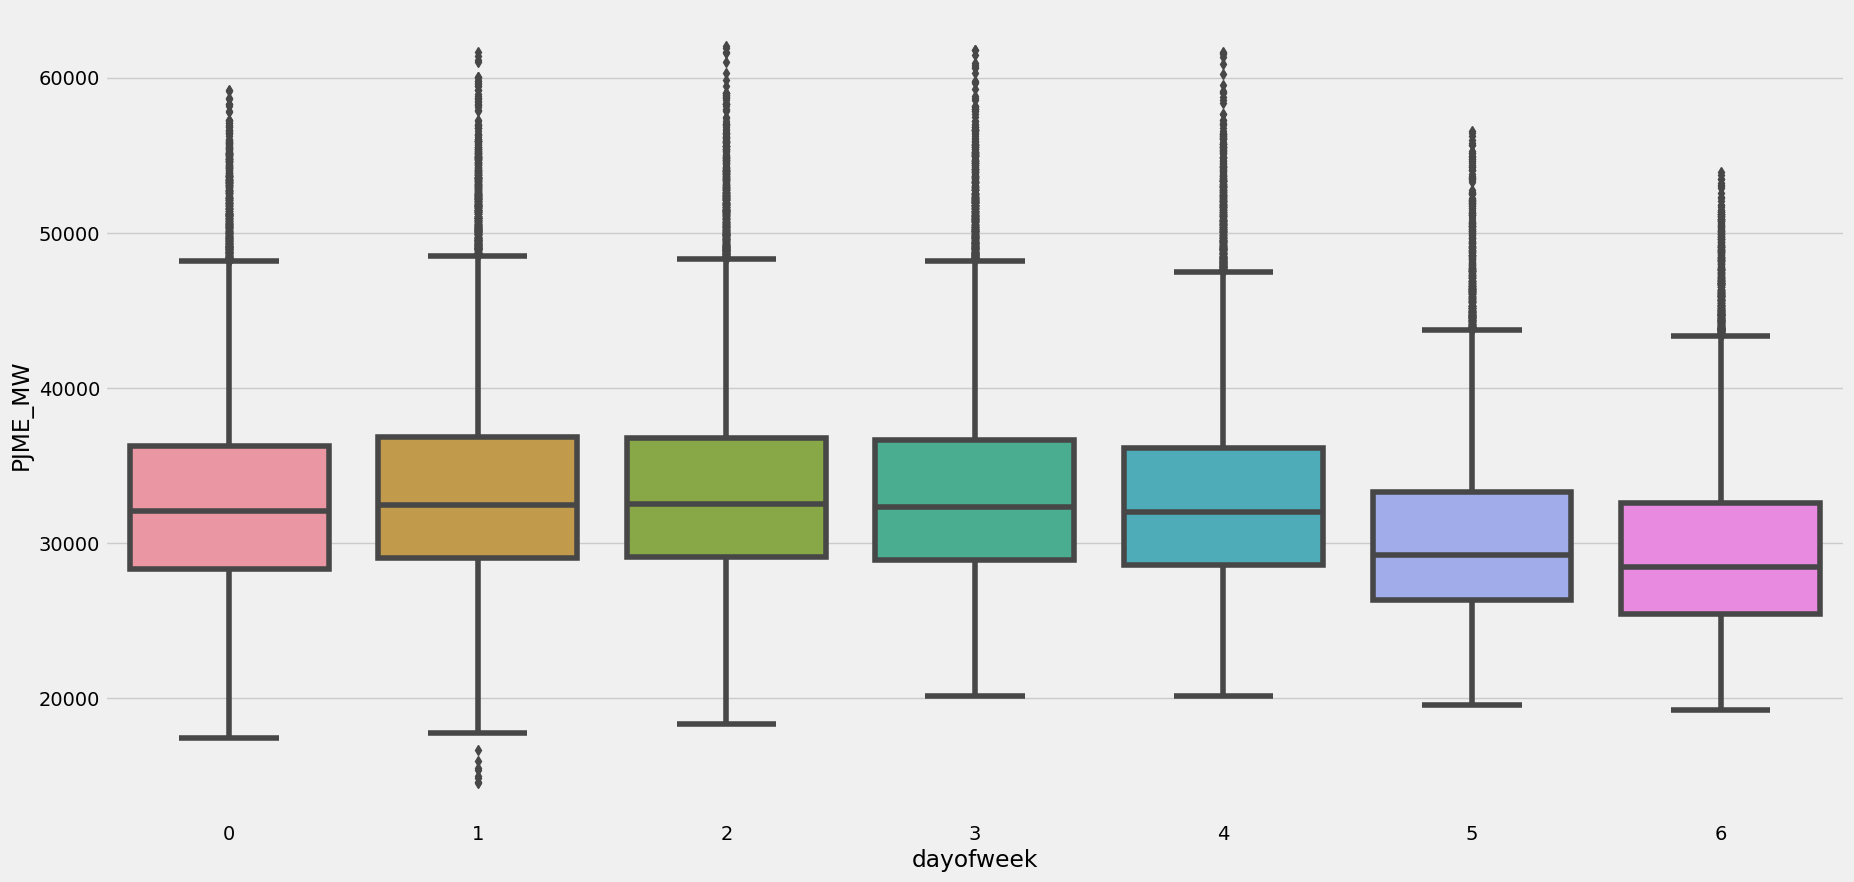

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=time,x='dayofweek',y='PJME_MW')

## Build Model

In [25]:
train_time=time.loc[time.index<'01-01-2016']
test_time=time.loc[time.index>='01-01-2016']

<Axes: xlabel='Datetime'>

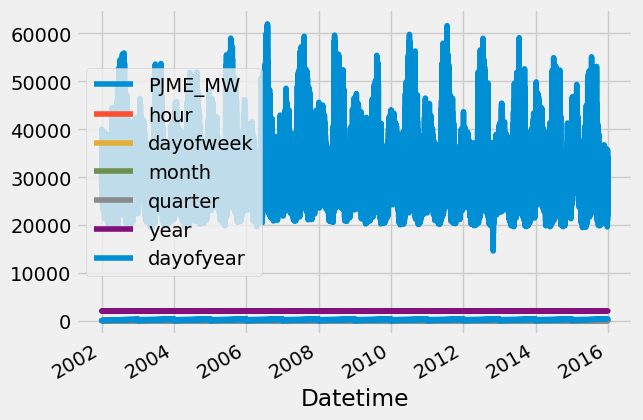

In [26]:
train_time.plot()

<Axes: xlabel='Datetime'>

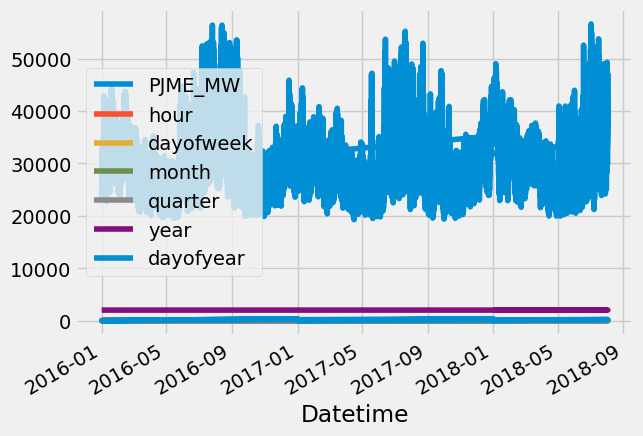

In [27]:
test_time.plot()

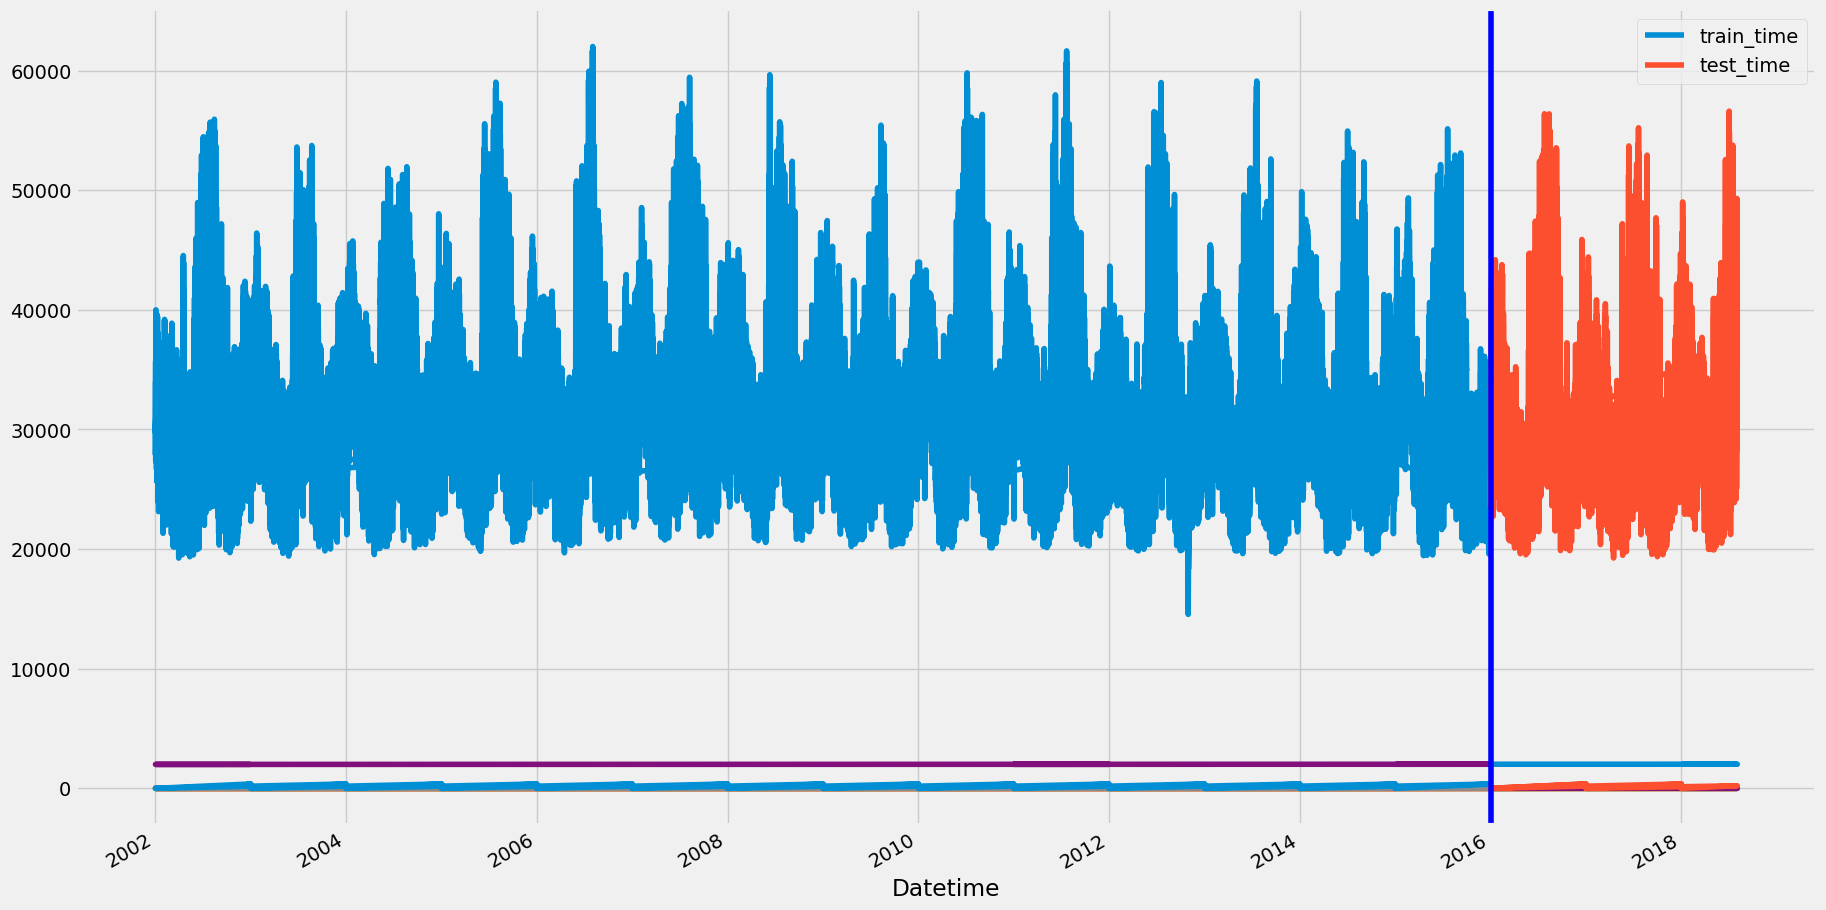

In [28]:
fig,ax=plt.subplots(figsize=(20,12))
train_time.plot(ax=ax)
test_time.plot(ax=ax)
ax.axvline('01-01-2016',color='blue')
plt.legend(['train_time','test_time'])

In [29]:
x_train=train_time.drop('PJME_MW',axis=1)
y_train=train_time['PJME_MW']

x_test=test_time.drop('PJME_MW',axis=1)
y_test=test_time['PJME_MW']

In [30]:
x_test

,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,
2016-01-01 00:00:00,0,4,1,1,2016,1
2016-12-31 01:00:00,1,5,12,4,2016,366
2016-12-31 02:00:00,2,5,12,4,2016,366
2016-12-31 03:00:00,3,5,12,4,2016,366
2016-12-31 04:00:00,4,5,12,4,2016,366
...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1
2018-01-01 21:00:00,21,0,1,1,2018,1
2018-01-01 22:00:00,22,0,1,1,2018,1


In [31]:
y_test

Datetime
2016-01-01 00:00:00    26686.0
2016-12-31 01:00:00    29627.0
2016-12-31 02:00:00    28744.0
2016-12-31 03:00:00    28274.0
2016-12-31 04:00:00    28162.0
                        ...   
2018-01-01 20:00:00    44284.0
2018-01-01 21:00:00    43751.0
2018-01-01 22:00:00    42402.0
2018-01-01 23:00:00    40164.0
2018-01-02 00:00:00    38608.0
Name: PJME_MW, Length: 22680, dtype: float64

In [32]:
Model=XGBRegressor(n_estimator=1000,early_stopping_round=60)

In [33]:
Model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=60,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [34]:
Model.score(x_train,y_train)

0.9273236517782665

In [35]:
testing=Model.predict(x_test)

In [36]:
mean_squared_error(testing,y_test)

21091869.06978954